In [7]:
import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt 

import sys
sys.path.append('/Users/sw/Documents/Github/GoFundMe_scraper')
from GoFundMe_scraper import ShowMore_clicker, MyWebScraper, profile_reader

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Web Scraping

In [2]:
search_links = \
['https://www.gofundme.com/discover/cancer-fundraiser',
'https://www.gofundme.com/discover/surgery-fundraiser',
'https://www.gofundme.com/discover/competition-fundraiser',
'https://www.gofundme.com/discover/creative-fundraiser',
'https://www.gofundme.com/discover/education-fundraiser',
'https://www.gofundme.com/discover/sports-fundraiser']

In [ ]:
start_time = time.time()
for i in range(len(search_links)):
    search_res = MyWebScraper(search_links[i])
    if search_res.num_supply == 1000: 
        print('=================================================================')
        print("--- %s have found ---" % (search_res.num_supply))
        try:
            scraping_res = list(map(profile_reader, search_res.fundraisers_links))
            scraping_res = pd.DataFrame(scraping_res, columns = [['title','created_date','tag','location','text']])
            scraping_res['link'] = search_res.fundraisers_links
            scraping_res.to_csv("20210122/" + search_res.search_term + ".csv",index=False,sep=',')
            print("--- SCRAPING SUCCEEDED ---")
        except:
            pass  
    
print("--- %s seconds ---" % (time.time() - start_time))

# Data Enrichment

In [4]:
mypath = '20210122'
l = []
for (dirpath, dirnames, filenames) in os.walk(mypath):
    l.extend(os.path.join(dirpath, filename) for filename in filenames)
    
l = [x for x in l if '.csv' in x]
l

['20210122/education.csv',
 '20210122/surgery.csv',
 '20210122/cancer.csv',
 '20210122/creative.csv',
 '20210122/competition.csv',
 '20210122/sports.csv']

In [10]:
for i in l:
    a = pd.read_csv(i, index_col=None, header=0)
    finished = a[a.text.notnull()]
    pending = a[a.text.isnull()]
    
    scraping_res = list(map(profile_reader, pending.link))
    scraping_res = pd.DataFrame(scraping_res, columns = [['title','created_date','tag','location','text']])
    scraping_res['link'] = pending.link.tolist()
    
    scraping_res.to_csv('temp.csv', index=False,sep=',')
    scraping_res = pd.read_csv('temp.csv', index_col=None, header=0)
    
    a = pd.concat([finished, scraping_res])
    a.to_csv(i , index=False,sep=',')

    print(i, len(pending), len(scraping_res[scraping_res.text.isnull()]))

20210122/education.csv 177 8
20210122/surgery.csv 214 80
20210122/cancer.csv 351 23
20210122/creative.csv 423 91
20210122/competition.csv 488 273
20210122/sports.csv 198 48


In [11]:
for i in l:
    a = pd.read_csv(i, index_col=None, header=0)
    finished = a[a.text.notnull()]
    pending = a[a.text.isnull()]

    scraping_res = list(map(profile_reader, pending.link))
    scraping_res = pd.DataFrame(
        scraping_res,
        columns=[['title', 'created_date', 'tag', 'location', 'text']])
    scraping_res['link'] = pending.link.tolist()

    scraping_res.to_csv('temp.csv', index=False, sep=',')
    scraping_res = pd.read_csv('temp.csv', index_col=None, header=0)

    a = pd.concat([finished, scraping_res])
    a.to_csv(i, index=False, sep=',')

    print(i, len(pending), len(scraping_res[scraping_res.text.isnull()]))

20210122/education.csv 8 8
20210122/surgery.csv 80 3
20210122/cancer.csv 23 5
20210122/creative.csv 91 20
20210122/competition.csv 273 113
20210122/sports.csv 48 13


In [12]:
for i in l:
    a = pd.read_csv(i, index_col=None, header=0)
    finished = a[a.text.notnull()]
    pending = a[a.text.isnull()]

    scraping_res = list(map(profile_reader, pending.link))
    scraping_res = pd.DataFrame(
        scraping_res,
        columns=[['title', 'created_date', 'tag', 'location', 'text']])
    scraping_res['link'] = pending.link.tolist()

    scraping_res.to_csv('temp.csv', index=False, sep=',')
    scraping_res = pd.read_csv('temp.csv', index_col=None, header=0)

    a = pd.concat([finished, scraping_res])
    a.to_csv(i, index=False, sep=',')

    print(i, len(pending), len(scraping_res[scraping_res.text.isnull()]))

20210122/education.csv 8 8
20210122/surgery.csv 3 3
20210122/cancer.csv 5 5
20210122/creative.csv 20 6
20210122/competition.csv 113 63
20210122/sports.csv 13 13


In [13]:
for i in l:
    a = pd.read_csv(i, index_col=None, header=0)
    finished = a[a.text.notnull()]
    pending = a[a.text.isnull()]

    scraping_res = list(map(profile_reader, pending.link))
    scraping_res = pd.DataFrame(
        scraping_res,
        columns=[['title', 'created_date', 'tag', 'location', 'text']])
    scraping_res['link'] = pending.link.tolist()

    scraping_res.to_csv('temp.csv', index=False, sep=',')
    scraping_res = pd.read_csv('temp.csv', index_col=None, header=0)

    a = pd.concat([finished, scraping_res])
    a.to_csv(i, index=False, sep=',')

    print(i, len(pending), len(scraping_res[scraping_res.text.isnull()]))

20210122/education.csv 8 8
20210122/surgery.csv 3 3
20210122/cancer.csv 5 5
20210122/creative.csv 6 6
20210122/competition.csv 63 63
20210122/sports.csv 13 13


In [10]:
for i in l:
    a = pd.read_csv(i, index_col=None, header=0)
    finished = a[a.text.notnull()]
    pending = a[a.text.isnull()]

    scraping_res = list(map(profile_reader, pending.link))
    scraping_res = pd.DataFrame(
        scraping_res,
        columns=[['title', 'created_date', 'tag', 'location', 'text']])
    scraping_res['link'] = pending.link.tolist()

    scraping_res.to_csv('temp.csv', index=False, sep=',')
    scraping_res = pd.read_csv('temp.csv', index_col=None, header=0)

    a = pd.concat([finished, scraping_res])
    a.to_csv(i, index=False, sep=',')

    print(i, len(pending), len(scraping_res[scraping_res.text.isnull()]))

20210122/education.csv 8 8
20210122/surgery.csv 3 3
20210122/cancer.csv 5 5
20210122/creative.csv 6 6
20210122/competition.csv 63 63
20210122/sports.csv 13 13


# Frequency Distribution of Lexicon

In [5]:
import nltk
import spacy
nlp = spacy.load('en_core_web_lg')
# https://spacy.io/usage/spacy-101#annotations-token
# https://realpython.com/natural-language-processing-spacy-python/#using-spacy
# https://blog.ekbana.com/nlp-for-beninners-using-spacy-6161cf48a229
# https://stackoverflow.com/questions/58128757/lemmatization-of-words-using-spacy-and-nltk-not-giving-correct-lemma

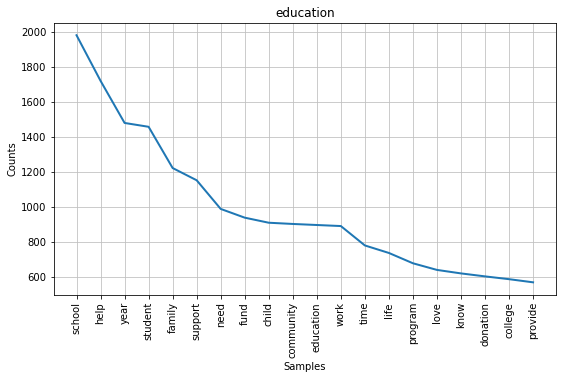

<AxesSubplot:title={'center':'education'}, xlabel='Samples', ylabel='Counts'>

In [15]:
for index in range(len(l)):
    #if index != 0:
    #    continue
    d = pd.read_csv(l[index])

    agg_lexicon = []
    for i in d.text:
        if str(i) == 'nan':
            continue
        doc = nlp(i)
        lexicon = [
            token.lemma_.strip().lower() for token in doc
            if token.is_stop != True and token.is_punct != True
            and token.is_digit != True and token.is_currency != True
        ]
        agg_lexicon = agg_lexicon + lexicon

    fig = plt.figure(figsize=(9, 5))
    word_counts = nltk.FreqDist(agg_lexicon)
    word_counts.plot(20,
                     cumulative=False,
                     title=l[index].split('.csv')[0].split('/')[1])
    plt.show()
    fig.savefig(l[index].replace('.csv', '.png'), bbox_inches="tight", dpi=1000)
    # https://stackoverflow.com/questions/52908305/how-to-save-a-nltk-freqdist-plot